<a href="https://colab.research.google.com/github/MariiaKalinina/R/blob/main/Histogram%20diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import *
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [29]:
path_to_ser = Path('/content/Графики.xlsx')
data = pd.read_excel(path_to_ser, sheet_name='to use_tc', skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [30]:
data[:5]

,Глубина,Литология,Sample ID,Target,ГК,ГГпК,ПС,КС,Predicted TC,"Diff, %","Diff, %.1",Unnamed: 11,Unnamed: 12,Unnamed: 13
0,12.8,Гнейсы,NaN,NaN,17.27,37.18000,3.6066,474.61,3.262043,NaN,0.0,NaN,NaN,0.0
1,12.9,Гнейсы,NaN,NaN,16.55,37.31333,3.6258,416.40,3.179086,NaN,0.0,NaN,NaN,5.0
2,13.0,Гнейсы,NaN,NaN,17.76,36.76500,3.7374,452.74,3.412361,NaN,0.0,NaN,NaN,NaN
3,13.3,Гнейсы,NaN,NaN,20.77,37.88667,3.7362,511.12,3.160654,NaN,0.0,NaN,NaN,NaN
4,13.4,Гнейсы,NaN,NaN,21.58,37.17333,3.8441,443.10,3.202509,NaN,0.0,NaN,NaN,NaN


In [31]:
data["Diff, %"].max()

54.170759422296875

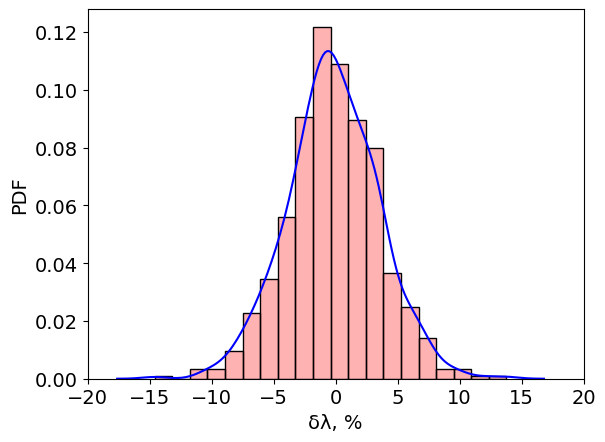

In [20]:

# Assuming x3 is defined and data_set is available
x3 = data["Diff, %"]

fig, ax = plt.subplots()

# Normalized histogram
sns.histplot(x3, bins=20, ax=ax, stat="density", color="red", alpha=0.3)
sns.kdeplot(x3, ax=ax, color="blue")

# Calculate the 2.5th and 97.5th percentiles to find the 0.95 confidence interval
lower_bound, upper_bound = np.percentile(x3, [2.5, 97.5])

# Add lines for the confidence interval
# ax.axvline(lower_bound, color='green', linestyle='--', label='2.5th percentile (Lower CI)')
# ax.axvline(upper_bound, color='green', linestyle='--', label='97.5th percentile (Upper CI)')

ax.set_xlim(-20, 20)
ax.set_xlabel('δλ, %', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
# ax.legend()
# plt.savefig('plot.tiff', format='tiff', dpi=300)
plt.show()

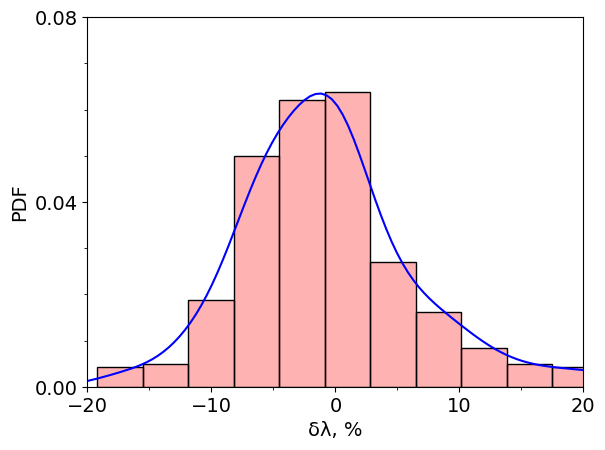

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker, font_manager
import warnings

# Suppress warnings about font family not found
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")


# Assuming 'data' is a DataFrame and 'Diff, %' is a column in it
x3 = data["Diff, %"]

# Set the font to Times New Roman for all text elements
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14  # You can adjust the size as needed

fig, ax = plt.subplots()

# Normalized histogram
sns.histplot(x3, bins=20, ax=ax, stat="density", color="red", alpha=0.3)
sns.kdeplot(x3, ax=ax, color="blue")

# Calculate the 2.5th and 97.5th percentiles to find the 0.95 confidence interval
lower_bound, upper_bound = np.percentile(x3, [2.5, 97.5])

# Set x-axis limits
ax.set_xlim(-20, 20)
ax.set_ylim(0, 0.08)

# Set the major ticks on the x-axis to a step of 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major tick step to 5
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))  # Keep minor tick step at 1 for finer granularity


# Set the major ticks on the x-axis to a step of 5
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))  # Set major tick step to 5
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))  # Keep minor tick step at 1 for finer granularity


# Set labels
ax.set_xlabel('δλ, %')
ax.set_ylabel('PDF')


plt.show()

In [11]:
!pip install ipywidgets matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Assuming 'data' is a DataFrame and 'Diff, %' is a column in it
x3 = data["Diff, %"]

def update_plot(bins, color, lower_alpha):
    fig, ax = plt.subplots()
    sns.histplot(x3, bins=bins, ax=ax, stat="density", color=color, alpha=lower_alpha)
    sns.kdeplot(x3, ax=ax, color="blue")

    # Calculate the 2.5th and 97.5th percentiles to find the 0.95 confidence interval
    lower_bound, upper_bound = np.percentile(x3, [2.5, 97.5])

    # Add lines for the confidence interval
    ax.axvline(lower_bound, color='green', linestyle='--', label='2.5th percentile (Lower CI)')
    ax.axvline(upper_bound, color='green', linestyle='--', label='97.5th percentile (Upper CI)')

    ax.set_xlim(-20, 20)
    ax.set_xlabel('δλ, %', fontsize=14)
    ax.set_ylabel('PDF', fontsize=14)
    ax.legend()
    plt.show()

# Create interactive widgets
bins_slider = widgets.IntSlider(value=20, min=1, max=50, step=1, description='Bins:')
color_picker = widgets.ColorPicker(value='red', description='Histogram Color:')
alpha_slider = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.1, description='Alpha:')

# Display the interactive widgets
widgets.interactive(update_plot, bins=bins_slider, color=color_picker, lower_alpha=alpha_slider)

interactive(children=(IntSlider(value=20, description='Bins:', max=50, min=1), ColorPicker(value='red', descri…